In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os, sys

In [3]:
import warnings
from pathlib import Path
warnings.filterwarnings('ignore')

import os, sys
curruser = os.environ.get('USER')
sys.path.insert(0, './../src/')
sys.path.insert(0, '/home/{}/notebooks/support_library/'.format(curruser)) 
sys.path.insert(0, '/home/{}/python35-libs/lib/python3.5/site-packages/'.format(curruser))
# sys.path.insert(0, '/home/ufimtsev1-ys_ca-sbrf-ru/notebooks/labdata/lib/')

import re 
import time
import joblib
import numpy as np
import pandas as pd
import subprocess
from sshloader import Ssh

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.options.display.max_columns = 1000


# pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pd.set_option('display.max_colwidth', -1)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

from csv import QUOTE_ALL 

from tqdm import tqdm
from tqdm._tqdm_notebook import tqdm_notebook
# tqdm_notebook.pandas()

import feature_importance

import sklearn
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedShuffleSplit, StratifiedKFold

from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, \
                            classification_report, precision_score, \
                            recall_score, roc_curve, precision_recall_curve, \
                            average_precision_score, make_scorer, confusion_matrix, get_scorer
            
from sklearn.preprocessing import binarize, OneHotEncoder


print(sklearn.__version__)
print(xgboost.__version__)
print(pd.__version__)

0.21.3
0.81
0.25.3


### Fetch data for Training

In [4]:
%%time
path = './csv/sampled_data_vector_train/'
filelist = os.listdir(path)
# df=pd.DataFrame([])
# df = pd.read_csv(filepath_or_buffer = path+filelist[0], sep = ';', nrows=0, compression = 'gzip', engine='python',
#                  dtype = {'target' : np.int32, 'OPF_IP': np.float32 ,'OPF_OOO': np.float32 ,'OPF_Other': np.float32 ,'ab_borrowed_capital': np.float32 ,'ab_immobilized_assets': np.float32 ,'ab_losses': np.float32 ,'ab_own_capital': np.float32 ,'acquiring_mobile': np.float32 ,'acquiring_torg': np.float32 ,'acreditiv': np.float32 ,'active_flg': np.float32 ,'all_prod_deals_completed': np.float32 ,'all_prod_deals_created': np.float32 ,'arenda_seyf': np.float32 ,'bank_straxovanie_imush': np.float32 ,'bank_straxovanie_lich': np.float32 ,'bank_straxovanie_otvet': np.float32 ,'branch_cnt': np.float32 ,'campaign_nm': np.float32 ,'cash_management': np.float32 ,'corp_cards': np.float32 ,'corp_cards_prod_deals_completed': np.float32 ,'corp_cards_prod_deals_created': np.float32 ,'corporate_cards': np.float32 ,'cred_application_cnt': np.float32 ,'cred_sdo': np.float32 ,'credit': np.float32 ,'credit_prod_deals_completed': np.float32 ,'credit_prod_deals_created': np.float32 ,'dbo': np.float32 ,'deposit': np.float32 ,'deposit_sertificat': np.float32 ,'deposits': np.float32 ,'depozit_prod_deals_completed': np.float32 ,'depozit_prod_deals_created': np.float32 ,'egr_org_id': np.float32 ,'egrul_org_id': np.float32 ,'einvoicing': np.float32 ,'email': np.float32 ,'factoring': np.float32 , 'fot_balance': np.float32, 'founders_all_cnt': np.float32 ,'founders_fl_cnt': np.float32 ,'founders_foreign_ul_cnt': np.float32 ,'founders_ul_cnt': np.float32 ,'fresh_user': np.float32 ,'garantee_gos': np.float32 ,'garantee_kontract': np.float32 ,'garantee_other': np.float32 ,'gis_bank_payment_flg': np.float32 ,'gis_card_payment_flg': np.float32 ,'gis_cash_payment_flg': np.float32 ,'gis_internet_merchant_flg': np.float32 ,'gis_internet_payment_flg': np.float32 ,'gis_merchant_cnt': np.float32 ,'gis_network_flg': np.float32 ,'gis_opt_merchant_flg': np.float32 ,'gis_production_merchant_flg': np.float32 ,'gis_rosn_merchant_flg': np.float32 ,'industry': np.float32 ,'inkass': np.float32 ,'insure_prod_deals_completed': np.float32 ,'insure_prod_deals_created': np.float32 ,'integrum_lower_bound': np.float32 ,'invest_kredit': np.float32 ,'ip_flg': np.float32 ,'konversion': np.float32 ,'kpp_regions_cnt': np.float32 ,'last_click_all_cnt_m11': np.float32 ,'last_click_all_cnt_m21': np.float32 ,'last_click_all_cnt_m31': np.float32 ,'last_click_day_cnt_m11': np.float32 ,'last_click_day_cnt_m21': np.float32 ,'last_click_day_cnt_m31': np.float32 ,'last_open_all_cnt_m11': np.float32 ,'last_open_all_cnt_m21': np.float32 ,'last_open_all_cnt_m31': np.float32 ,'last_open_day_cnt_m11': np.float32 ,'last_open_day_cnt_m21': np.float32 ,'last_open_day_cnt_m31': np.float32 ,'license_cnt': np.float32 ,'main_inn': np.float32 ,'main_kpp': np.float32 ,'main_organization_id': np.float32 ,'max_zp_empl_cnt': np.float32 ,'merch': np.float32 ,'merch_prod_deals_completed': np.float32 ,'merch_prod_deals_created': np.float32 ,'min_zp_empl_cnt': np.float32 ,'ns_servis': np.float32 ,'ns_terminal': np.float32 ,'oborot_kredit': np.float32 ,'obsluzh_rts_rur': np.float32 ,'obsluzh_rts_val': np.float32 ,'overdraft_kredit': np.float32 ,'products_lizing': np.float32 ,'proekt_finans': np.float32 ,'rko': np.float32 ,'salary': np.float32 ,'salary_prod_deals_completed': np.float32 ,'salary_prod_deals_created': np.float32 ,'samoinkass': np.float32 ,'spec_acc': np.float32 ,'stoplist': np.float32 ,'target': np.float32 ,'tb_Centralno_Chernozemnyj': np.float32 ,'tb_Dalnevostochnyj': np.float32 ,'tb_Moskovskij': np.float32 ,'tb_Povolzhskij': np.float32 ,'tb_Severo_Zapadnyj': np.float32 ,'tb_Uralskij': np.float32 ,'tb_Volgo_Vyatskij': np.float32 ,'total_count_dt': np.float32 ,'total_count_dt_3m': np.float32 ,'total_count_dt_year18': np.float32 ,'total_count_kt': np.float32 ,'total_count_kt_3m': np.float32 ,'total_count_kt_year18': np.float32 ,'ul_org_id': np.float32 ,'valuta_control': np.float32 ,'veksel': np.float32 ,'zarplat_projects': np.float32, 'sum_open_click_camp': np.float32, 'ul_kopf_cd': np.float32 },   
#                  usecols = lambda columns : columns not in ['text', 'text_norm', 'inn', 'kpp', 'organization_id', 'email','campaign_nm', 'idx', 'fresh_user', 'complicity_type', 'ogrn', 'sum_open_click_camp'] 
#                  )
df = pd.read_csv(filepath_or_buffer = path+filelist[0], sep = ';', nrows=0, compression = 'gzip', engine='python',
                 usecols = lambda columns : columns not in ['text', 'text_norm', 'inn', 'kpp', 'organization_id', 'email','campaign_nm', 'idx', 'fresh_user', 'complicity_type', 'ogrn', 'sum_open_click_camp'] 
                 )
for file in tqdm_notebook(filelist[:3]+filelist[4:]): #filelist[:3]+filelist[4:]
    if 'csv' in file:
        print(file)
        dftmp = pd.read_csv(filepath_or_buffer = path+file ,sep = ';', quoting = QUOTE_ALL,
                            doublequote = False,
                            index_col=False, 
                            error_bad_lines=False,
                            usecols = df.columns,
                            compression = 'gzip',
                            engine='python'
                           )
        
        df = pd.concat([df,dftmp], ignore_index=True)
        del dftmp
        print(df.shape)

part-00000-837850b4-4251-4919-9756-8b623b270d72-c000.csv.gz
(2141716, 515)
part-00001-837850b4-4251-4919-9756-8b623b270d72-c000.csv.gz
(4218563, 515)
part-00002-837850b4-4251-4919-9756-8b623b270d72-c000.csv.gz
(6390680, 515)
part-00004-837850b4-4251-4919-9756-8b623b270d72-c000.csv.gz
(8724269, 515)
part-00005-837850b4-4251-4919-9756-8b623b270d72-c000.csv.gz
(11453836, 515)

CPU times: user 1h 54min 51s, sys: 42min 52s, total: 2h 37min 43s
Wall time: 2h 37min 43s


### Fetching data for Test

In [ ]:
%%time
path = './csv/sampled_data_vector_test/'
filelist = os.listdir(path)
# df=pd.DataFrame([])
# df_test = pd.read_csv(filepath_or_buffer = path+filelist[0], sep = ';', nrows=0, compression = 'gzip',
#                  dtype = {'target' : np.int32, 'OPF_IP': np.float32 ,'OPF_OOO': np.float32 ,'OPF_Other': np.float32 ,'ab_borrowed_capital': np.float32 ,'ab_immobilized_assets': np.float32 ,'ab_losses': np.float32 ,'ab_own_capital': np.float32 ,'acquiring_mobile': np.float32 ,'acquiring_torg': np.float32 ,'acreditiv': np.float32 ,'active_flg': np.float32 ,'all_prod_deals_completed': np.float32 ,'all_prod_deals_created': np.float32 ,'arenda_seyf': np.float32 ,'bank_straxovanie_imush': np.float32 ,'bank_straxovanie_lich': np.float32 ,'bank_straxovanie_otvet': np.float32 ,'branch_cnt': np.float32 ,'campaign_nm': np.float32 ,'cash_management': np.float32 ,'corp_cards': np.float32 ,'corp_cards_prod_deals_completed': np.float32 ,'corp_cards_prod_deals_created': np.float32 ,'corporate_cards': np.float32 ,'cred_application_cnt': np.float32 ,'cred_sdo': np.float32 ,'credit': np.float32 ,'credit_prod_deals_completed': np.float32 ,'credit_prod_deals_created': np.float32 ,'dbo': np.float32 ,'deposit': np.float32 ,'deposit_sertificat': np.float32 ,'deposits': np.float32 ,'depozit_prod_deals_completed': np.float32 ,'depozit_prod_deals_created': np.float32 ,'egr_org_id': np.float32 ,'egrul_org_id': np.float32 ,'einvoicing': np.float32 ,'email': np.float32 ,'factoring': np.float32 , 'fot_balance': np.float32, 'founders_all_cnt': np.float32 ,'founders_fl_cnt': np.float32 ,'founders_foreign_ul_cnt': np.float32 ,'founders_ul_cnt': np.float32 ,'fresh_user': np.float32 ,'garantee_gos': np.float32 ,'garantee_kontract': np.float32 ,'garantee_other': np.float32 ,'gis_bank_payment_flg': np.float32 ,'gis_card_payment_flg': np.float32 ,'gis_cash_payment_flg': np.float32 ,'gis_internet_merchant_flg': np.float32 ,'gis_internet_payment_flg': np.float32 ,'gis_merchant_cnt': np.float32 ,'gis_network_flg': np.float32 ,'gis_opt_merchant_flg': np.float32 ,'gis_production_merchant_flg': np.float32 ,'gis_rosn_merchant_flg': np.float32 ,'industry': np.float32 ,'inkass': np.float32 ,'insure_prod_deals_completed': np.float32 ,'insure_prod_deals_created': np.float32 ,'integrum_lower_bound': np.float32 ,'invest_kredit': np.float32 ,'ip_flg': np.float32 ,'konversion': np.float32 ,'kpp_regions_cnt': np.float32 ,'last_click_all_cnt_m11': np.float32 ,'last_click_all_cnt_m21': np.float32 ,'last_click_all_cnt_m31': np.float32 ,'last_click_day_cnt_m11': np.float32 ,'last_click_day_cnt_m21': np.float32 ,'last_click_day_cnt_m31': np.float32 ,'last_open_all_cnt_m11': np.float32 ,'last_open_all_cnt_m21': np.float32 ,'last_open_all_cnt_m31': np.float32 ,'last_open_day_cnt_m11': np.float32 ,'last_open_day_cnt_m21': np.float32 ,'last_open_day_cnt_m31': np.float32 ,'license_cnt': np.float32 ,'main_inn': np.float32 ,'main_kpp': np.float32 ,'main_organization_id': np.float32 ,'max_zp_empl_cnt': np.float32 ,'merch': np.float32 ,'merch_prod_deals_completed': np.float32 ,'merch_prod_deals_created': np.float32 ,'min_zp_empl_cnt': np.float32 ,'ns_servis': np.float32 ,'ns_terminal': np.float32 ,'oborot_kredit': np.float32 ,'obsluzh_rts_rur': np.float32 ,'obsluzh_rts_val': np.float32 ,'overdraft_kredit': np.float32 ,'products_lizing': np.float32 ,'proekt_finans': np.float32 ,'rko': np.float32 ,'salary': np.float32 ,'salary_prod_deals_completed': np.float32 ,'salary_prod_deals_created': np.float32 ,'samoinkass': np.float32 ,'spec_acc': np.float32 ,'stoplist': np.float32 ,'target': np.float32 ,'tb_Centralno_Chernozemnyj': np.float32 ,'tb_Dalnevostochnyj': np.float32 ,'tb_Moskovskij': np.float32 ,'tb_Povolzhskij': np.float32 ,'tb_Severo_Zapadnyj': np.float32 ,'tb_Uralskij': np.float32 ,'tb_Volgo_Vyatskij': np.float32 ,'total_count_dt': np.float32 ,'total_count_dt_3m': np.float32 ,'total_count_dt_year18': np.float32 ,'total_count_kt': np.float32 ,'total_count_kt_3m': np.float32 ,'total_count_kt_year18': np.float32 ,'ul_org_id': np.float32 ,'valuta_control': np.float32 ,'veksel': np.float32 ,'zarplat_projects': np.float32, 'sum_open_click_camp': np.float32, 'ul_kopf_cd': np.float32 },   
#                  usecols = lambda columns : columns not in ['text', 'text_norm', 'inn', 'kpp', 'organization_id', 'email','campaign_nm', 'idx', 'fresh_user', 'complicity_type', 'ogrn', 'sum_open_click_camp'] 
#                  )
df_test = pd.read_csv(filepath_or_buffer = path+filelist[0], sep = ';', nrows=0, compression = 'gzip',
                      usecols = lambda columns : columns not in ['text', 'text_norm', 'inn', 'kpp', 'organization_id', 'email','campaign_nm', 'idx', 'fresh_user', 'complicity_type', 'ogrn', 'sum_open_click_camp'] 
                 )
for file in tqdm_notebook(filelist[:3]+filelist[4:]): #filelist[:3]+filelist[4:]
    if 'csv' in file:
        print(file)
        dftmp = pd.read_csv(filepath_or_buffer = path+file ,sep = ';', quoting = QUOTE_ALL,
                            doublequote = False,
                            index_col=False, 
                            error_bad_lines=False,
                            usecols = df_test.columns,
                            compression = 'gzip'
                           )
        
        df_test = pd.concat([df_test,dftmp], ignore_index=True)
        del dftmp
        print(df_test.shape)

### Columns segmentation

In [5]:
import re
pattern = re.compile(r'.*_m\d{1}1')
pattern.findall('diff_lcl_fo_m11')
ftcols = [col for col in list(df.columns) if '_FT_' in col]
respcols = [col for col in list(df.columns) if len(pattern.findall(col))!=0]
ml360cols = list(set(list(df.columns)) - set(respcols) - set(ftcols))

### Build a datasets for Train/Test  

In [7]:
df.head()

,target,OPF_IP,OPF_OOO,OPF_Other,ab_borrowed_capital,ab_immobilized_assets,ab_losses,ab_own_capital,acquiring_mobile,acquiring_torg,acreditiv,active_flg,all_prod_deals_completed,all_prod_deals_created,ar_net_profit,ar_profit_before_tax,ar_revenue,ar_taxes,ar_total_expenses,arenda_seyf,bank_straxovanie_imush,bank_straxovanie_lich,bank_straxovanie_otvet,branch_cnt,call_first_check,cash_management,clk_on_dlv_all_rate_m11,clk_on_dlv_all_rate_m21,clk_on_dlv_all_rate_m31,clk_on_dlv_day_rate_m11,clk_on_dlv_day_rate_m21,clk_on_dlv_day_rate_m31,clk_on_open_all_rate_m11,clk_on_open_all_rate_m21,clk_on_open_all_rate_m31,clk_on_open_day_rate_m11,clk_on_open_day_rate_m21,clk_on_open_day_rate_m31,corp_cards_prod_deals_completed,corp_cards_prod_deals_created,corporate_cards,cred_application_cnt,cred_sdo,credit,credit_prod_deals_completed,credit_prod_deals_created,dbo,deposit,deposit_sertificat,deposits,depozit_prod_deals_completed,depozit_prod_deals_created,diff_fcl_fo_m11,diff_fcl_fo_m21,diff_fcl_fo_m31,diff_fcl_fs_m11,diff_fcl_fs_m21,diff_fcl_fs_m31,diff_fcl_lo_m11,diff_fcl_lo_m21,diff_fcl_lo_m31,diff_fcl_ls_m11,diff_fcl_ls_m21,diff_fcl_ls_m31,diff_fo_fs_m11,diff_fo_fs_m21,diff_fo_fs_m31,diff_fo_ls_m11,diff_fo_ls_m21,diff_fo_ls_m31,diff_lcl_fcl_m11,diff_lcl_fcl_m21,diff_lcl_fcl_m31,diff_lcl_fo_m11,diff_lcl_fo_m21,diff_lcl_fo_m31,diff_lcl_fs_m11,diff_lcl_fs_m21,diff_lcl_fs_m31,diff_lcl_lo_m11,diff_lcl_lo_m21,diff_lcl_lo_m31,diff_lcl_ls_m11,diff_lcl_ls_m21,diff_lcl_ls_m31,diff_lo_fo_m11,diff_lo_fo_m21,diff_lo_fo_m31,diff_lo_fs_m11,diff_lo_fs_m21,diff_lo_fs_m31,diff_lo_ls_m11,diff_lo_ls_m21,diff_lo_ls_m31,egr_org_id,egrul_org_id,einvoicing,factoring,fot_balance,founders_all_cnt,founders_fl_cnt,founders_foreign_ul_cnt,founders_ul_cnt,garantee_gos,garantee_kontract,garantee_other,gis_bank_payment_flg,gis_card_payment_flg,gis_cash_payment_flg,gis_internet_merchant_flg,gis_internet_payment_flg,gis_merchant_cnt,gis_network_flg,gis_opt_merchant_flg,gis_production_merchant_flg,gis_rosn_merchant_flg,industry,inkass,insure_prod_deals_completed,insure_prod_deals_created,integrum_lower_bound,invest_kredit,ip_flg,konversion,kpp_regions_cnt,last_click_all_cnt_m11,last_click_all_cnt_m21,last_click_all_cnt_m31,last_click_day_cnt_m11,last_click_day_cnt_m21,last_click_day_cnt_m31,last_open_all_cnt_m11,last_open_all_cnt_m21,last_open_all_cnt_m31,last_open_day_cnt_m11,last_open_day_cnt_m21,last_open_day_cnt_m31,license_cnt,max_zp_empl_cnt,mean_zp,mean_zp_empl_cnt,merch,merch_prod_deals_completed,merch_prod_deals_created,min_zp_empl_cnt,ns_servis,ns_terminal,oborot_kredit,obsluzh_rts_val,open_on_dlv_all_rate_m11,open_on_dlv_all_rate_m21,open_on_dlv_all_rate_m31,open_on_dlv_day_rate_m11,open_on_dlv_day_rate_m21,open_on_dlv_day_rate_m31,overdraft_kredit,penalty_foreign,penalty_foreign_3m,penalty_foreign_year18,penalty_income,penalty_income_3m,penalty_income_year18,penalty_ip,penalty_ip_3m,penalty_ip_year18,products_lizing,proekt_finans,rate_diff,rko,salary_prod_deals_completed,salary_prod_deals_created,samoinkass,spec_acc,stoplist,tax_foreign,tax_foreign_3m,tax_foreign_year18,tax_income,tax_income_3m,tax_income_year18,tax_ip,tax_ip_3m,tax_ip_year18,tb_Centralno_Chernozemnyj,tb_Dalnevostochnyj,tb_Moskovskij,tb_Povolzhskij,tb_Severo_Zapadnyj,tb_Uralskij,tb_Volgo_Vyatskij,total_count_dt,total_count_dt_3m,total_count_dt_year18,total_count_kt,total_count_kt_3m,total_count_kt_year18,total_sum_dt,total_sum_dt_3m,total_sum_dt_year18,total_sum_kt,total_sum_kt_3m,total_sum_kt_year18,ul_kopf_cd,ul_org_id,valuta_control,veksel,weight_prc,zarplat_projects,zp_amount,big_segment_idx,crm_segment_idx,fot_segment_idx,complicity_type_idx,otrasl_idx,prior_true_idx,_FT_200,_FT_92,_FT_264,_FT_151,_FT_196,_FT_58,_FT_62,_FT_189,_FT_124,_FT_35,_FT_256,_FT_191,_FT_31,_FT_10,_FT_208,_FT_137,_FT_170,_FT_129,_FT_157,_FT_207,_FT_127,_FT_86,_FT_217,_FT_272,_FT_254,_FT_199,_FT_125,_FT_197,_FT_296,_FT_295,_FT_166,_FT_287,_FT_39,_FT_79,_FT_138,_FT_202,_FT_117,_FT_119,_FT_91,_FT_122,_FT_179,_FT_50,

In [11]:
df.shape

(11453836, 515)

In [13]:
df.target.value_counts()

0.0    7687849
1.0    3765987
Name: target, dtype: int64

In [7]:
sratio = 0.6
df_part = df.groupby(['target'], group_keys=False).apply(lambda x: x.sample(n=int(np.rint(sratio*len(x))), random_state=42))

In [8]:
csvpath = Path.joinpath(Path(os.getcwd()),'csv','data4train_sampled_60pct.csv')
df_part.to_csv(csvpath, index=False, encoding='cp1251',sep=';', compression='gzip')

In [ ]:
# print(df_part.shape)

In [9]:
X_train, X_test, y_train, y_test = \
train_test_split(df_part[respcols+ml360cols].drop(['target'], axis=1), df_part.target, 
                 random_state=42, shuffle=True, test_size=0.2)

# X_train = df_part[respcols+ml360cols].drop(['target'], axis=1)
# y_train = df_part.target

In [10]:
del df, df_part

## Train xgboost 

In [11]:
def get_metrics(y_pred, y, average='binary'):
    print(classification_report(y, y_pred, digits=5, ))
    recall = recall_score(y, y_pred, average=average)
    precision=precision_score(y, y_pred,average=average)
    f1=f1_score(y, y_pred,average=average)
    
    return recall, precision, f1

In [12]:
def feature_impotance(model, X_train, count_top_features = 20):
    imp=model.feature_importances_
    names=X_train.columns
    imp, names=map(list, zip(*sorted(zip(imp, names))[::-1][:count_top_features]))
    
    fig, ax = plt.subplots(figsize=(9,12))
    #ax = plt.axes()
    sns.barplot(x=imp, y=names, palette=sns.color_palette('YlGn', 2), ax=ax)
    ax.set_title('Top ' + str(count_top_features) + ' important features')
    plt.show()

In [13]:
model=XGBClassifier(max_depth=5, min_child_weight=4, n_estimators=700, seed=42, n_jobs = -1)

In [ ]:
model.fit(X_train.astype(float), y_train)

In [15]:
joblib.dump(model, 'model/xgboost_part_200605.pkl')

['model/xgboost_part_200605.pkl']

### Get Metrics before Features Selection Procedure

In [ ]:
try:
    y_pred = model.predict(X_test.astype(float))
except ValueError as err:
    colsstr     = str(err).split('feature_names mismatch: ')[1].split(' [')[0]
    getcolslist = list(ast.literal_eval(colsstr[1:-1]))            
    y_pred = model.predict(X_test[getcolslist].astype(float)) 

recall_ts, precision_ts, f1_ts =  get_metrics(y_pred.astype(int), y_test.astype(int))
                                                  
print('Hold Out: ')
print('Precision: %7.5f, Recall: %7.5f, F_1: %7.5f' % 
(precision_ts, recall_ts, f1_ts))

## Features Elimination: Running Leave-One-Out Technique 

In [8]:
model = joblib.load('model/xgboost_part_200210.pkl')

In [27]:
fi = feature_importance.FeatureImportance(X_train.astype(float), 
                                          X_test.astype(float), 
                                          y_train, 
                                          y_test,
                                          model,
                                          metric='recall')

In [ ]:
feature_imp = fi.get_leave_one_out(n_jobs=12, verbose=1)

In [ ]:
feature_imp[feature_imp['features'].str.contains('diff_')].sort_values(by=['leave_one_out_recall'], ascending = False).head(30)

In [ ]:
feature_imp.leave_one_out_recall.min(), feature_imp.leave_one_out_recall.max()

In [17]:
feature_imp.to_pickle('leave_one_out_recall.pkl')

In [35]:
feature_imp = joblib.load('./pkl/leave_one_out_recall.pkl')

In [36]:
selected_features = feature_imp[(feature_imp.leave_one_out_recall < 0.00)]

In [37]:
selected_features['leave_one_out_recall'] = selected_features['leave_one_out_recall'].apply(lambda x: '{0:.5f}'.format(x))

In [ ]:
selected_features.sort_values(by=['leave_one_out_recall'], ascending = False).head(30)

In [39]:
selected_features.shape

(108, 2)

### Retrain model: selection of features whose removal leads to a decreasing of recall

In [43]:
model=XGBClassifier(max_depth=5, min_child_weight=4, n_estimators=600, seed=42, n_jobs = -1)

In [ ]:
model.fit(X_train[selected_features.features.tolist()].astype(float), y_train)

In [ ]:
y_pred = model.predict(X_test[selected_features.features.tolist()])

recall_ts, precision_ts, f1_ts =  get_metrics(y_pred.astype(int), y_test.astype(int))
                                                  
print('Hold Out: ')
print('Precision: %7.5f, Recall: %7.5f, F_1: %7.5f' % 
(precision_ts, recall_ts, f1_ts))

## RFE with Fine-Tuned XGB (Fine-Tuning on ALL Features)

In [119]:
from sklearn.feature_selection import RFECV, RFE

In [120]:
n_splits=6
#cvs=[StratifiedKFold(n_splits), StratifiedShuffleSplit(n_splits)]
cvs=[StratifiedShuffleSplit(n_splits)]
scores=[]
split_names=[]

xgb = XGBClassifier( seed=42, n_jobs = 40)
random_search = joblib.load('./pkl/random_search_xgb_no_FT_200606.pkl')
pipeline = Pipeline([
    ('clf', xgb),
     ])

classifier = pipeline.set_params(clf__n_estimators                 = random_search.best_params_['clf__n_estimators'],
                                 clf__learning_rate                = random_search.best_params_['clf__learning_rate'],
                                 clf__num_leaves                   = random_search.best_params_['clf__num_leaves'],
                                 clf__max_bin                      = random_search.best_params_['clf__max_bin'],
                                 clf__max_depth                    = random_search.best_params_['clf__max_depth'],
                                 clf__scale_pos_weight             = random_search.best_params_['clf__scale_pos_weight'],
                                 clf__colsample_bytree             = random_search.best_params_['clf__colsample_bytree'],                                 
                                 clf__min_child_samples            = random_search.best_params_['clf__min_child_samples'],
                                 clf__min_data_in_leaf             = random_search.best_params_['clf__min_data_in_leaf'],
                                 clf__min_child_weight             = random_search.best_params_['clf__min_child_weight'],
                                 clf__feature_fraction             = random_search.best_params_['clf__feature_fraction'],
                                 clf__bagging_fraction             = random_search.best_params_['clf__bagging_fraction'],
                                 clf__bagging_freq                 = random_search.best_params_['clf__bagging_freq'],
                                 clf__lambda_l1                    = random_search.best_params_['clf__lambda_l1'],
                                 clf__lambda_l2                    = random_search.best_params_['clf__lambda_l2'],
                                 clf__n_jobs                       = 40,
                                 clf__tree_method                  = random_search.best_params_['clf__tree_method'],
                                 )

In [ ]:
for cv in cvs:
    rfe = RFECV(xgb, cv=cv, step=1, scoring='recall', verbose=2)
    print('Running CV with ' + type(rfe.cv).__name__ + '\n')
    rfe.fit(X_train.astype(dtype=np.float32), y_train)
    scores.append(rfe.grid_scores_)
    split_names.append(type(rfe.cv).__name__)

In [ ]:
joblib.dump(rfe, './pkl/rfecv_trn_200607.pkl')

In [ ]:
rfe=joblib.load('./pkl/rfecv_trn_200607.pkl')

In [ ]:
rfe.n_features_

In [13]:
rfe.estimator.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=4, missing=nan, n_estimators=600,
              n_jobs=-1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, silent=True, subsample=1)

In [14]:
X_train.loc[:,rfe.support_].columns

Index(['clk_on_dlv_all_rate_m11', 'clk_on_open_all_rate_m11',
       'clk_on_open_day_rate_m11', 'diff_fcl_fo_m11', 'diff_fcl_fo_m21',
       'diff_fcl_fo_m31', 'diff_fcl_fs_m11', 'diff_fcl_lo_m11',
       'diff_fcl_lo_m21', 'diff_fcl_ls_m11', 'diff_fo_fs_m11',
       'diff_fo_fs_m21', 'diff_fo_fs_m31', 'diff_fo_ls_m11',
       'diff_lcl_fcl_m11', 'diff_lcl_fo_m11', 'diff_lcl_fs_m11',
       'diff_lcl_lo_m11', 'diff_lcl_lo_m21', 'diff_lo_fo_m11',
       'diff_lo_fo_m21', 'diff_lo_fo_m31', 'diff_lo_fs_m11', 'diff_lo_fs_m21',
       'diff_lo_ls_m11', 'last_click_all_cnt_m11', 'last_click_day_cnt_m11',
       'last_open_all_cnt_m11', 'last_open_all_cnt_m21',
       'last_open_all_cnt_m31', 'last_open_day_cnt_m11',
       'last_open_day_cnt_m21', 'last_open_day_cnt_m31',
       'open_on_dlv_all_rate_m11', 'open_on_dlv_all_rate_m21',
       'open_on_dlv_all_rate_m31', 'open_on_dlv_day_rate_m11',
       'open_on_dlv_day_rate_m21', 'open_on_dlv_day_rate_m31', 'tax_ip_year18',
       'ar_profi

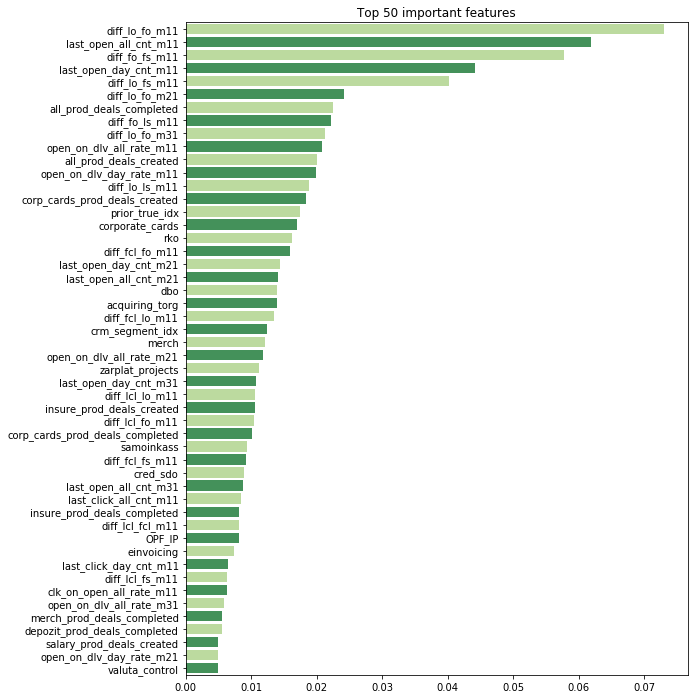

In [18]:
feature_impotance(rfe.estimator, X_train, count_top_features = 50)

### Retrain model: selection of features after finishing RFECV process

In [53]:
rfe=joblib.load('./pkl/rfecv_trn.pkl')
rfecols = X_train.loc[:,rfe.support_].columns

In [59]:
len(rfecols)

93

In [54]:
model=XGBClassifier(max_depth=5, min_child_weight=4, n_estimators=600, seed=42, n_jobs = -1)

In [55]:
model.fit(X_train[rfecols].astype(dtype=np.float32), y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=4, missing=None, n_estimators=600,
              n_jobs=-1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, silent=True, subsample=1)

In [58]:
y_pred = model.predict(X_test[rfecols])

recall_ts, precision_ts, f1_ts =  get_metrics(y_pred.astype(int), y_test.astype(int))
                                                  
print('Hold Out: ')
print('Precision: %7.5f, Recall: %7.5f, F_1: %7.5f' % 
(precision_ts, recall_ts, f1_ts))

              precision    recall  f1-score   support

           0    0.68481   0.96550   0.80128    501931
           1    0.49807   0.07154   0.12511    240238

    accuracy                        0.67612    742169
   macro avg    0.59144   0.51852   0.46319    742169
weighted avg    0.62436   0.67612   0.58240    742169

Hold Out: 
Precision: 0.49807, Recall: 0.07154, F_1: 0.12511


## XGBoost' Parameters Optimization and FineTuning

In [31]:
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedShuffleSplit, StratifiedKFold
from sklearn.pipeline import Pipeline, FeatureUnion
from time import time

In [108]:
classifier = XGBClassifier(random_state=42, n_jobs=40, tree_method='hist',)

### Define pipeline dictionary for optimization with CV 

In [86]:
# Define parameter distribution over which to perform CV

param_dist = {
    "clf__n_estimators":                  [400, 500, 800, 1000],
    "clf__learning_rate":                 [0.005, 0.01, 0.04, 0.08],
    "clf__num_leaves":                    [64, 128, 256, 512],
    "clf__min_data_in_leaf":              [20, 50, 100, 250],
    "clf__colsample_bytree":              [0.5, 0.7, 0.8, 1.],
    "clf__scale_pos_weight":              [2.041, 1.5, 1.2, 1.],
    "clf__max_bin":                       [255, 230, 200, 180],
    "clf__max_depth":                     [5, 6, 8, 10],
    'clf__min_child_samples':             [20, 40, 100],
    'clf__min_child_weight':              [1e-5, 1e-3, 1e-2, 1e-1, 1.],
    'clf__feature_fraction':              [0.7, 0.8, 0.9, 1],
    'clf__bagging_fraction':              [0.2, 0.5, 0.8, 1.],
    'clf__bagging_freq':                  [0, 10, 20, 40],
    'clf__lambda_l1':                     [0, 1e-3, 1e-2, 1e-1],
    'clf__lambda_l2':                     [0, 1e-3, 1e-2, 1e-1],
    'clf__n_jobs':                        [20, 20, 20, 20],
    'clf__tree_method':                   ['hist', 'hist', 'hist', 'hist']
    #'clf__is_unbalance':             [True, False]
}

n_iter_search = 3 # Define number of search iterations
n_folds = 6 # Define number of CV folds

In [87]:
folds = StratifiedShuffleSplit(n_splits=n_folds, test_size=0.2)

In [88]:
pipeline = Pipeline([
    ('clf', classifier),
     ])

random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=n_iter_search, cv=folds, 
                                   scoring='recall', n_jobs=7, verbose=2)

In [ ]:
# X_train = df[respcols+ml360cols].drop(['target'], axis=1)
# y_train = df.target

In [89]:
start = time()

random_search.fit(X_train.astype(dtype=np.float32), y_train)

print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))      
print("\nBest Score = " + str(random_search.best_score_))
print("\nBest Parameters = " + str(random_search.best_params_))


Fitting 6 folds for each of 3 candidates, totalling 18 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.


[Parallel(n_jobs=7)]: Done  15 out of  18 | elapsed: 83.1min remaining: 16.6min
[Parallel(n_jobs=7)]: Done  18 out of  18 | elapsed: 90.3min finished


[19:31:29] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
RandomizedSearchCV took 6095.65 seconds for 3 candidates parameter settings.

Best Score = 0.5064616959185649

Best Parameters = {'clf__max_bin': 255, 'clf__learning_rate': 0.08, 'clf__lambda_l2': 0.001, 'clf__n_estimators': 800, 'clf__min_child_weight': 0.001, 'clf__n_jobs': 20, 'clf__colsample_bytree': 0.7, 'clf__lambda_l1': 0.001, 'clf__bagging_fraction': 1.0, 'clf__min_child_samples': 20, 'clf__feature_fraction': 0.7, 'clf__min_data_in_leaf': 20, 'clf__tree_method': 'hist', 'clf__scale_pos_weight': 2.041, 'clf__max_depth': 10, 'clf__num_leaves': 64, 'clf__bagging_freq': 40}


In [46]:
joblib.dump(random_search, './pkl/random_search_xgb_no_FT_200606.pkl')

['./pkl/random_search_xgb_no_FT_200606.pkl']

### Fit cls with the best params selected

In [113]:
classifier = pipeline.set_params(clf__n_estimators                 = random_search.best_params_['clf__n_estimators'],
                                 clf__learning_rate                = random_search.best_params_['clf__learning_rate'],
                                 clf__num_leaves                   = random_search.best_params_['clf__num_leaves'],
                                 clf__max_bin                      = random_search.best_params_['clf__max_bin'],
                                 clf__max_depth                    = random_search.best_params_['clf__max_depth'],
                                 clf__scale_pos_weight             = random_search.best_params_['clf__scale_pos_weight'],
                                 clf__colsample_bytree             = random_search.best_params_['clf__colsample_bytree'],                                 
                                 clf__min_child_samples            = random_search.best_params_['clf__min_child_samples'],
                                 clf__min_data_in_leaf             = random_search.best_params_['clf__min_data_in_leaf'],
                                 clf__min_child_weight             = random_search.best_params_['clf__min_child_weight'],
                                 clf__feature_fraction             = random_search.best_params_['clf__feature_fraction'],
                                 clf__bagging_fraction             = random_search.best_params_['clf__bagging_fraction'],
                                 clf__bagging_freq                 = random_search.best_params_['clf__bagging_freq'],
                                 clf__lambda_l1                    = random_search.best_params_['clf__lambda_l1'],
                                 clf__lambda_l2                    = random_search.best_params_['clf__lambda_l2'],
                                 clf__n_jobs                       = 40,
                                 clf__tree_method                  = random_search.best_params_['clf__tree_method'],
                                 )

In [115]:
classifier.fit(X_train.astype(float), y_train)

[20:38:00] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.


Pipeline(memory=None,
         steps=[('clf',
                 XGBClassifier(bagging_fraction=1.0, bagging_freq=40,
                               base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bytree=0.7,
                               feature_fraction=0.7, gamma=0, lambda_l1=0.001,
                               lambda_l2=0.001, learning_rate=0.08, max_bin=255,
                               max_delta_step=0, max_depth=10,
                               min_child_samples=20, min_child_weight=0.001,
                               min_data_in_leaf=20, missing=None,
                               n_estimators=800, n_jobs=40, njobs=-1,
                               nthread=None, num_leaves=64,
                               objective='binary:logistic', random_state=42,
                               reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=2.041, seed=None, silent=True, ...))],
         verbose=False)

In [116]:
y_pred = classifier.predict(X_test.astype(float))

recall_ts, precision_ts, f1_ts =  get_metrics(y_pred.astype(int), y_test.astype(int))
                                                  
print('Hold Out: ')
print('Precision: %7.5f, Recall: %7.5f, F_1: %7.5f' % 
(precision_ts, recall_ts, f1_ts))

              precision    recall  f1-score   support

           0    0.75230   0.73242   0.74223    922443
           1    0.48189   0.50789   0.49455    452018

    accuracy                        0.65858   1374461
   macro avg    0.61710   0.62015   0.61839   1374461
weighted avg    0.66337   0.65858   0.66077   1374461

Hold Out: 
Precision: 0.48189, Recall: 0.50789, F_1: 0.49455


In [117]:
joblib.dump(classifier, './pkl/xgb_cls_tuned_pipe_noFT_200606.pkl')

['./pkl/xgb_cls_tuned_pipe_noFT_200606.pkl']

# Probabilities Calibration 

In [335]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

In [41]:
sratio = 0.5
X_train = X_train.sample(frac=sratio, random_state=42)
X_test  = X_test.sample(frac=sratio, random_state=42)
y_train = y_train.sample(frac=sratio, random_state=42)
y_test  = y_test.sample(frac=sratio, random_state=42)

In [11]:
import matplotlib.pyplot as plt
import ast

### Load Pretrained XGB Model

In [336]:
xgb = joblib.load('./pkl/xgb_cls_with_FT_tr_9m.pkl')

In [337]:
try:
    y_proba = xgb.predict_proba(X_test.astype(float))[:, 1]
except ValueError as err:
    colsstr     = str(err).split('feature_names mismatch: ')[1].split(' [')[0]
    getcolslist = list(ast.literal_eval(colsstr[1:-1]))            
    y_proba = xgb.predict_proba(X_test[getcolslist].astype(float))[:, 1]  

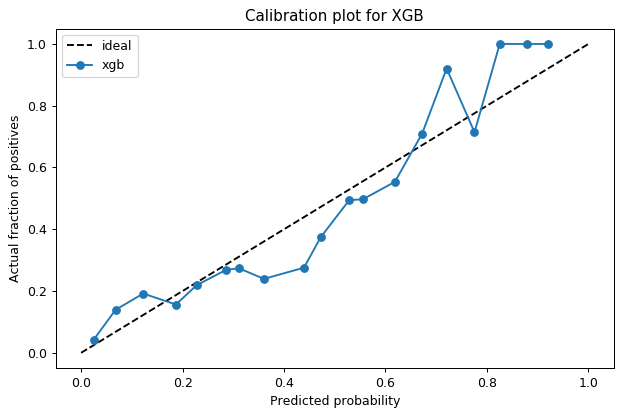

In [28]:
# creating a dataframe of target and probabilities
prob_df_xgb = pd.DataFrame({'y':y_test, 'y_hat': y_proba})

# binning the dataframe, so we can see success rates for bins of probability
bins = np.arange(0.05, 1.00, 0.05)
prob_df_xgb.loc[:,'prob_bin'] = np.digitize(prob_df_xgb['y_hat'], bins)
prob_df_xgb.loc[:,'prob_bin_val'] = prob_df_xgb['prob_bin'].replace(dict(zip(range(len(bins)), bins)))

# opening figure
plt.figure(figsize=(8,5), dpi=90)

# plotting ideal line
plt.plot([0,1],[0,1], 'k--', label='ideal')

# plotting calibration for xgb
calibration_y = prob_df_xgb.groupby('prob_bin_val')['y'].mean()
calibration_x = prob_df_xgb.groupby('prob_bin_val')['y_hat'].mean()
plt.plot(calibration_x, calibration_y, marker='o', label='xgb')

# legend and titles
plt.title('Calibration plot for XGB')
plt.xlabel('Predicted probability')
plt.ylabel('Actual fraction of positives')
plt.legend()
plt.show()

In [ ]:
# use CalibratedClassifierCV with sigmoid and isotonic parameters

fig, ax = plt.subplots(1,figsize=(12,8))

fraction_of_pos, mean_pred_val = calibration_curve(y_test, y_proba, n_bins=20)
plt.plot(mean_pred_val, fraction_of_pos, 's-', markersize=2, color='red', label='Uncalibrated')
plt.plot([0,1],[0,1],'--',color='gray')

methodlst=['sigmoid','isotonic']
clr=['blue','green']
i=0
for method in methodlst:
    clf_calib=CalibratedClassifierCV(xgb, cv='prefit', method=method)
  
    try:
        dm_trainx = xgboost.DMatrix(X_train.values, feature_names= X_train.columns)
        dm_trainy = xgboost.DMatrix(y_train.values.reshape(-1,1))
        clf_calib.fit(dm_trainx, dm_trainy)
    except ValueError as err:
        colsstr     = str(err).split('feature_names mismatch: ')[1].split(' [')[0]
        getcolslist = list(ast.literal_eval(colsstr[1:-1]))
        _X_train = _X_train[getcolslist]
        dm_trainx = xgboost.DMatrix(_X_train.values, feature_names= _X_train.columns)
        dm_trainy = xgboost.DMatrix(y_train.values.reshape(-1,1))
        del _X_train
        clf_calib.fit(dm_trainx, dm_trainy)
        
    y_tst_clf_calib_proba=clf_calib.predict_proba(X_test)[:,1]
    fraction_of_pos, mean_pred_val = calibration_curve(y_test, y_tst_clf_calib_proba, n_bins=30)
    plt.plot(mean_pred_val, fraction_of_pos, 's-', markersize=2, color=clr[i], label='Calibrated %s' % method)
    i=i+1
    
plt.xlabel('Mean Predicted Value')
plt.ylabel('Fraction of Positives')
plt.legend(loc='best')
plt.title('Compare Calibration Curves')
plt.show()

In [389]:
del dm_trainx, dm_trainy 

In [390]:
Out.clear()

In [ ]:
del prob_df_xgb
del y_proba
del clf_calib
del y_tst_clf_calib_proba

## TRAIN: Logistic Regression on the leaves of forests

In [173]:
# use the .apply method to get the indices of the leaves each sample ended up into.
try:
#     X_train = X_train.astype(float)
    leaves = xgb.apply(X_train.astype(float))
except ValueError as err:
    colsstr = str(err).split('feature_names mismatch: ')[1].split(' [')[0]
    getcolslist = list(ast.literal_eval(colsstr[1:-1]))       
    leaves = xgb.apply(X_train[getcolslist].astype(float))

In [221]:
n = np.max(leaves)+1
_, n_features = leaves.shape

In [222]:
# then, we one-hot encode the leave indexes so we can use them in the logistic regression
encoder = OneHotEncoder(categories = [range(n)]*n_features, sparse=True)
leaves_encoded = encoder.fit_transform(leaves)

In [228]:
n_features*n

50400

In [227]:
leaves_encoded

<2556272x50400 sparse matrix of type '<class 'numpy.float64'>'
	with 2045017600 stored elements in Compressed Sparse Row format>

In [ ]:
# get_n_values = len(encoder.active_features_)

In [229]:
del leaves
del encoder

In [230]:
# we configure the logistic regression and fit it to the encoded leaves
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='sag', C=10**(-4), max_iter=700, n_jobs=30, fit_intercept=False)
lr.fit(leaves_encoded.astype(np.int), y_train.astype(int))

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=700,
                   multi_class='warn', n_jobs=30, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0, 0.5, 'Probabilities after Logistic Regression')

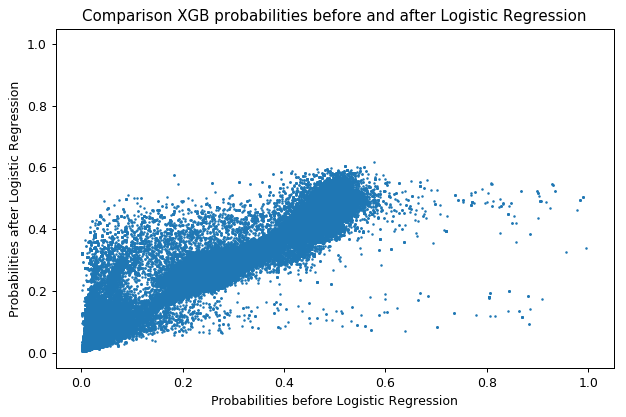

In [231]:
# let us check probabilities before and after logistic regression
preds_xgblr = lr.predict_proba(leaves_encoded)

try:
    preds_xgb = xgb.predict_proba(X_train.astype(float))
except ValueError as err:
    colsstr     = str(err).split('feature_names mismatch: ')[1].split(' [')[0]
    getcolslist = list(ast.literal_eval(colsstr[1:-1]))           
    preds_xgb   = xgb.predict_proba(X_train[getcolslist].astype(float)) 

# plotting the probabilities
plt.figure(figsize=(8,5), dpi=90)
plt.scatter(preds_xgb[:,1], preds_xgblr[:,1], s=1)
plt.xlim(-0.05,1.05); plt.ylim(-0.05,1.05)

# adding text
plt.title('Comparison XGB probabilities before and after Logistic Regression')
plt.xlabel('Probabilities before Logistic Regression')
plt.ylabel('Probabilities after Logistic Regression')

In [232]:
del leaves_encoded
del preds_xgblr
del preds_xgb

In [233]:
Out.clear()

## OOB: Validate recalibrated estimator

In [255]:
# use the .apply method to get the indices of the leaves each sample ended up into.
try:
#     X_train = X_train.astype(float)
    leaves = xgb.apply(X_test.astype(float))
except ValueError as err:
    colsstr = str(err).split('feature_names mismatch: ')[1].split(' [')[0]
    getcolslist = list(ast.literal_eval(colsstr[1:-1]))       
    leaves = xgb.apply(X_test[getcolslist].astype(float))

_, n_features = leaves.shape

encoder = OneHotEncoder(categories = [range(n)]*n_features, sparse=True)
leaves_encoded = encoder.fit_transform(leaves)

del encoder
del leaves

In [ ]:
leaves_encoded

Text(0, 0.5, 'Probabilities after Logistic Regression')

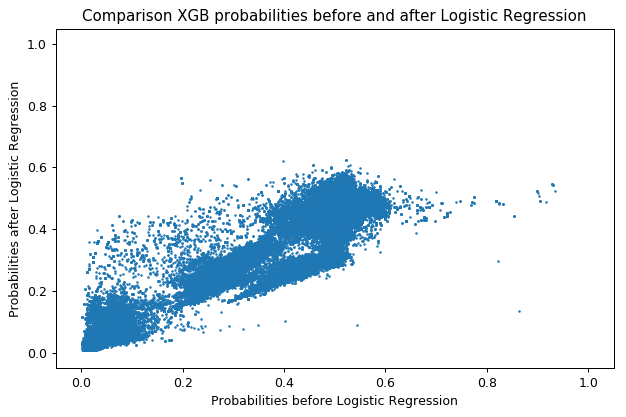

In [237]:
# let us check probabilities before and after logistic regression
preds_xgblr = lr.predict_proba(leaves_encoded)

try:
    preds_xgb = xgb.predict_proba(X_test.astype(float))
except ValueError as err:
    colsstr     = str(err).split('feature_names mismatch: ')[1].split(' [')[0]
    getcolslist = list(ast.literal_eval(colsstr[1:-1]))           
    preds_xgb   = xgb.predict_proba(X_test[getcolslist].astype(float)) 

# plotting the probabilities
plt.figure(figsize=(8,5), dpi=90)
plt.scatter(preds_xgb[:,1], preds_xgblr[:,1], s=1)
plt.xlim(-0.05,1.05); plt.ylim(-0.05,1.05)

# adding text
plt.title('Comparison XGB probabilities before and after Logistic Regression')
plt.xlabel('Probabilities before Logistic Regression')
plt.ylabel('Probabilities after Logistic Regression')

In [298]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [329]:
max_proba = np.max(preds_xgblr[:,1])
min_proba = np.min(preds_xgblr[:,1])

scaled_proba_lr = [(proba-min_proba)/(max_proba-min_proba) for proba in preds_xgblr[:,1]]

In [303]:
# try to use different scaling approaches
scaler = StandardScaler()
preds_xgblr_scl = scaler.fit_transform(preds_xgblr[:,1].reshape(-1, 1))

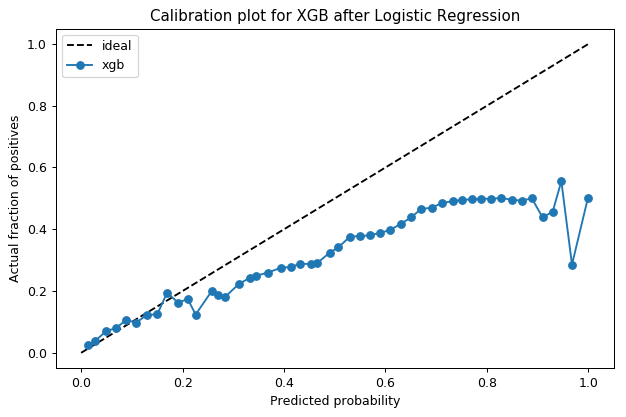

In [330]:
# creating a dataframe of target and probabilities
prob_df_xgblr = pd.DataFrame({'y':y_test, 'y_hat': scaled_proba_lr}) #np.squeeze(preds_xgblr_scl)

# binning the dataframe, so we can see success rates for bins of probability
bins = np.arange(0.02, 1, 0.02)
prob_df_xgblr.loc[:,'prob_bin'] = np.digitize(prob_df_xgblr['y_hat'], bins)
prob_df_xgblr.loc[:,'prob_bin_val'] = prob_df_xgblr['prob_bin'].replace(dict(zip(range(len(bins)), bins)))

# opening figure
plt.figure(figsize=(8,5), dpi=90)

# plotting ideal line
plt.plot([0,1],[0,1], 'k--', label='ideal')

# plotting calibration for xgb
calibration_y = prob_df_xgblr.groupby('prob_bin_val')['y'].mean()
calibration_x = prob_df_xgblr.groupby('prob_bin_val')['y_hat'].mean()
plt.plot(calibration_x, calibration_y, marker='o', label='xgb')

# legend and titles
plt.title('Calibration plot for XGB after Logistic Regression')
plt.xlabel('Predicted probability')
plt.ylabel('Actual fraction of positives')
plt.legend()
plt.show()

### Precision/Recall: Compare XGB with XGB+LR

In [324]:
## After LR

threshold=0.38
y_pred_lr = binarize(preds_xgblr[:,1].reshape(-1, 1), threshold=threshold).reshape(-1)
recall_ts, precision_ts, f1_ts =  get_metrics(y_pred_lr.astype(int), y_test.astype(int))
                                                  
print('Hold Out: ')
print('Precision: %7.5f, Recall: %7.5f, F_1: %7.5f' % 
(precision_ts, recall_ts, f1_ts))

              precision    recall  f1-score   support

           0    0.74604   0.78636   0.76567    852269
           1    0.49526   0.43919   0.46554    406800

    accuracy                        0.67419   1259069
   macro avg    0.62065   0.61277   0.61560   1259069
weighted avg    0.66501   0.67419   0.66870   1259069

Hold Out: 
Precision: 0.49526, Recall: 0.43919, F_1: 0.46554


In [319]:
# XGB only

threshold=0.5
y_pred_xgb = binarize(y_proba.reshape(-1, 1), threshold=threshold).reshape(-1)
recall_ts, precision_ts, f1_ts =  get_metrics(y_pred_xgb.astype(int), y_test.astype(int))
                                                  
print('Hold Out: ')
print('Precision: %7.5f, Recall: %7.5f, F_1: %7.5f' % 
(precision_ts, recall_ts, f1_ts))

              precision    recall  f1-score   support

           0    0.72132   0.84517   0.77835    852269
           1    0.49338   0.31589   0.38517    406800

    accuracy                        0.67416   1259069
   macro avg    0.60735   0.58053   0.58176   1259069
weighted avg    0.64767   0.67416   0.65132   1259069

Hold Out: 
Precision: 0.49338, Recall: 0.31589, F_1: 0.38517


In [ ]:
del leaves_encoded
del preds_xgblr
del preds_xgb
del y_pred_xgb
del y_pred_lr

In [334]:
Out.clear()